# ANOVA

### 1. Data Import

In [1]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

#Get Data
df_raw_data = pd.read_csv('../04_Preparing & Storing Data/dataset_homegate_enriched.csv', sep=',', encoding='utf-8')

#Size, Number of Columns
print(df_raw_data.shape)


(11302, 30)


### 2. Data Preparation

#### 2.1 Prolog

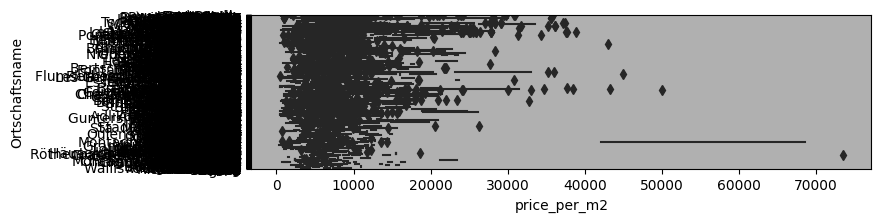

In [2]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="Ortschaftsname",
                 palette=['r', 'g', 'b'],
                 data=df_raw_data,
                 orient='h')
plt.grid()
plt.show()

Explanation for Data preparation
 - In this dataset, there are 1667 different "Ortschaften" 
   = (len(df_raw_data.drop_duplicates('Ortschaftsname'keep='first')))

  - This would result in a terribly confusing graphic, as seen in the picture above, which would not be useful for  
    data anaylitics.

  - Because of that, we cut the dataframe, to only include the 3 most expensive and the 3 cheapest "Ortschaften", as seen below. The considered variable was the price per m2 of the appartement or the house. For that, the following steps where  
    necessary:
    1. Find out, which 3 "Ortschaften" have the highest price (saved in df_high)
    2. Find out, which 3 "Ortschaften" have the lowest price (saved in df_low)
    3. Create a DF for all the rows with these Ortschaften (df_concatenated)

#### 2.2 Drop Ortschaften, which are represented less then 20x

In [3]:
print("Lenght of the df_raw_data before removal: ",len(df_raw_data))

#Drop all the Ortschaften, with less than 20 rows, so the results will have some statistical meaning
#With this code, all the Ortschaften get grouped and counted.
# i.e.: Aargau 20, Zürich 1, Winterthur 5
#The result gets saved in a Pandas Series-List
dfnew = df_raw_data.groupby('Ortschaftsname').size()


df_of_statistical_significance = []
#The Series-List is iterated via i (for index) and v (for the value)
#i represents the ortschaften and v the count of how many times this ortschaft is in the df_raw_data
for i,v in dfnew.items():
    
    #if the ortschaft is represented less then 20 times in the Series-List, the Ortschaft gets dropepd 
    if v<20:
        df_raw_data.drop(df_raw_data[df_raw_data['Ortschaftsname']==i].index, inplace=True)

     
print("Lenght of the df_raw_data after removal: ",len(df_raw_data))



Lenght of the df_raw_data before removal:  11302
Lenght of the df_raw_data after removal:  4939


In [18]:
#Aggregate the mean of the Ortschaften, to find the highest values
df_aggregatedMeans = df_raw_data.groupby('Ortschaftsname').agg('mean')


#with the nlargest and nsmallest, we only find out, which Ortschaften have the highest and lowest values
df_largest = df_aggregatedMeans.nlargest(3,['price_per_m2'])
df_smallest = df_aggregatedMeans.nsmallest(3,['price_per_m2'])
df_combined = pd.concat([df_largest,df_smallest])

print(df_largest)
print(df_smallest)


                Unnamed: 0     rooms        area         price          PLZ  \
Ortschaftsname                                                                
Cologny             6310.5  7.466667  319.633333  7.006667e+06  1223.000000   
Genève              1085.5  5.372642  172.018868  3.042577e+06  1205.617925   
Montreux             773.0  8.162791  333.232558  5.948488e+06  1820.000000   

                description_len  luxurious  furnished   balcony    garden  \
Ortschaftsname                                                              
Cologny             1188.633333   0.666667   0.000000  0.766667  0.433333   
Genève              1080.018957   0.454976   0.033175  0.691943  0.137441   
Montreux            1467.651163   0.604651   0.023256  0.627907  0.465116   

                   quiet   central  price_per_m2  BfS_Id  Kantonssteuerfuss  \
Ortschaftsname                                                                
Cologny         0.000000  0.433333  21111.762667  6617.0    

C:\Users\maxwo\AppData\Local\Temp\ipykernel_10652\3209751925.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_aggregatedMeans = df_raw_data.groupby('Ortschaftsname').agg('mean')


#### 2.3 Extract the rows from the original DataFrame belonging to the chosen Ortschaften

In [5]:
#now we have to create a DF with the all the rows that belong to these Ortschaften

listOrtschaften = df_combined.index.tolist()

print(listOrtschaften)
df_concatenated = pd.DataFrame()

for index,row in df_raw_data.iterrows():
    if row['Ortschaftsname'] not in listOrtschaften:
        df_raw_data = df_raw_data.drop(index)


print(df_raw_data.shape)




['Cologny', 'Genève', 'Montreux', 'Malvaglia', 'Acquarossa', 'Faido']
(364, 30)


In [6]:
#sort the values to know, which ones are the high and low priced ortschaften

df = df_raw_data.sort_values('price_per_m2')
df01 = df['Ortschaftsname'].drop_duplicates()
print(df01.head(6))


10801     Malvaglia
9742     Acquarossa
6716          Faido
1081         Genève
791        Montreux
6299        Cologny
Name: Ortschaftsname, dtype: object


#### 2.4 PIVOT-Table of the mean price per Ortschaft (only the selected 6)

In [30]:
table = pd.pivot_table(pd.concat([df_raw_data.query('Ortschaftsname == "Malvaglia"'),
                     df_raw_data.query('Ortschaftsname == "Acquarossa"'),
                     df_raw_data.query('Ortschaftsname == "Faido"'),
                     df_raw_data.query('Ortschaftsname == "Genève"'),
                     df_raw_data.query('Ortschaftsname == "Montreux"'),
                     df_raw_data.query('Ortschaftsname == "Cologny"') 
                     ]), 
                       values='price_per_m2',
                       columns=['Ortschaftsname'], 
                       aggfunc=np.mean)
print(table)

Ortschaftsname  Acquarossa       Cologny        Faido        Genève  \
price_per_m2     3418.8085  21111.762667  3654.333421  16964.908915   

Ortschaftsname    Malvaglia     Montreux  
price_per_m2    3321.590952  15856.15907  


### 3. Create Grouped Boxplot (groups = Ortschaften, values = price)

In [8]:
#Create Subsets for the highest and lowest priced Ortschaften

df_high = pd.concat([df_raw_data.query('Ortschaftsname == "Genève"'),
                     df_raw_data.query('Ortschaftsname == "Montreux"'),
                     df_raw_data.query('Ortschaftsname == "Cologny"')])


df_low = pd.concat([df_raw_data.query('Ortschaftsname == "Malvaglia"'),
                     df_raw_data.query('Ortschaftsname == "Acquarossa"'),
                     df_raw_data.query('Ortschaftsname == "Faido"')])

df_concatenated = pd.concat([df_high, df_low])


#### 3.1 Boxplot for the highest prices

##### With Outliers

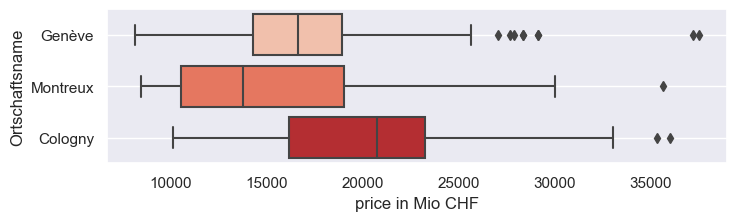

In [9]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
sns.set(style="darkgrid")
ax = sns.boxplot(x="price_per_m2",
                 y="Ortschaftsname",
                 palette="Reds",
                 data=df_high,
                 orient='h').set(xlabel="price in Mio CHF")
plt.grid()
plt.show()

##### Without Outliers

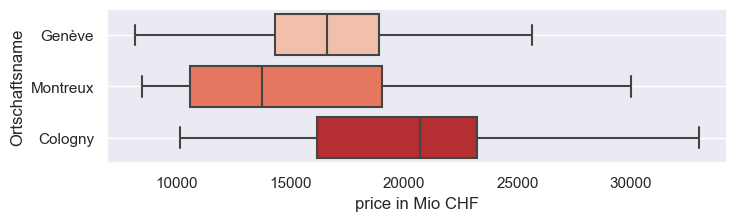

In [10]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="Ortschaftsname",
                 palette="Reds",
                 data=df_high,
                 orient='h',
                 showfliers = False).set(xlabel="price in Mio CHF")
plt.grid()
plt.show()

#### 3.2 Boxplot for the lowest prices

##### With Outliers

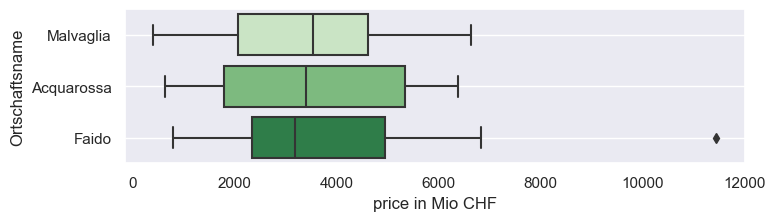

In [11]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="Ortschaftsname",
                 palette="Greens",
                 data=df_low,
                 orient='h').set(xlabel="price in Mio CHF")
plt.grid()
plt.show()

##### Without Outliers

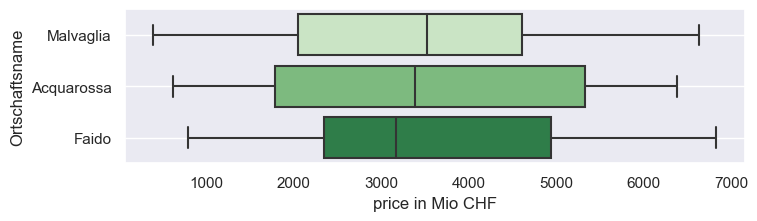

In [12]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="Ortschaftsname",
                 palette="Greens",
                 data=df_low,
                 orient='h',showfliers=False).set(xlabel="price in Mio CHF")
plt.grid()
plt.show()

#### 3.3 Boxplot for the 3 highest and 3 lowest priced Ortschaften

##### With Outliers

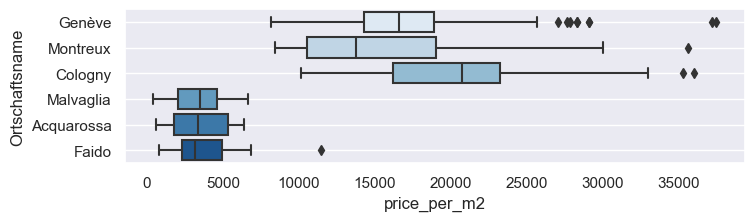

In [13]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="Ortschaftsname",
                 palette="Blues",
                 data=df_concatenated,
                 orient='h')
plt.grid()
plt.show()

##### Without Outliers

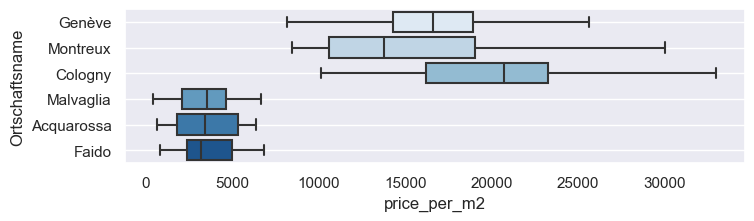

In [14]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="Ortschaftsname",
                 palette="Blues",
                 data=df_concatenated,
                 orient='h',showfliers=False)
plt.grid()
plt.show()

Ortschaftsname  Acquarossa       Cologny        Faido        Genève  \
price_per_m2     3418.8085  21111.762667  3654.333421  16964.908915   

Ortschaftsname    Malvaglia     Montreux  
price_per_m2    3321.590952  15856.15907  


### 4. Anova

H1: The mean price differs between different municipalities. <br>
H0: The mean price per m2 does not differ between the different municipalities. 


In the following Analysis of Variance, we calculate if there is a significant difference in the mean of the different subsets for the localities <br>-Acquarossa<br>-Cologny<br>-Faido<br>-Genève<br>-Malvaglia<br>-Montreux

In [32]:
table  = pd.pivot_table(df_raw_data,values='price_per_m2',columns=['Ortschaftsname'],aggfunc=np.mean)
print(table)



Ortschaftsname  Acquarossa       Cologny        Faido        Genève  \
price_per_m2     3418.8085  21111.762667  3654.333421  16964.908915   

Ortschaftsname    Malvaglia     Montreux  
price_per_m2    3321.590952  15856.15907  


##### 4.1 Analysis of Variance

In [ ]:
# Create subsets (groups)
cologny = df_concatenated.loc[df_concatenated['Ortschaftsname'] == 'Genève']
montreux = df_concatenated.loc[df_concatenated['Ortschaftsname'] == 'Montreux']
chexbres = df_concatenated.loc[df_concatenated['Ortschaftsname'] == 'Cologny']
cadenazzo = df_concatenated.loc[df_concatenated['Ortschaftsname'] == 'Malvaglia']
basse_nendaz = df_concatenated.loc[df_concatenated['Ortschaftsname'] == 'Acquarossa']
malvaglia = df_concatenated.loc[df_concatenated['Ortschaftsname'] == 'Faido']


# Create ANOVA for the expensive Ortschaften
fvalue, pvalue = stats.f_oneway(cologny['price_per_m2'],
                                montreux['price_per_m2'],
                                cadenazzo['price_per_m2'],
                                basse_nendaz['price_per_m2'],
                                chexbres['price_per_m2'],
                                malvaglia['price_per_m2'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(100))


F-value: 112.063 p-value 5.1300901696487585e-71


##### 4.2 Interpretation of results for the Expensive Ortschaften

The Analysis of Variance of the mean of the price_per_m2 per locality showed, that there is a significant difference. This shows, that the means of the prices per m2 differs between the highest priced localities and the lowest priced localities. Further Analysis however must be done to show, how this significant difference in the mean is created.
This could provide information into the fact, if we can generalize cantons. Maybe some localities inside the cantons dont follow the principle, that high tax prices correlate to lower price_per_m2.